<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [1]:
# Set your student number
student_number = 400101515
Name = 'Mahdi'
Last_Name = 'Tabatabaei'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

In [2]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

## Importing Libraries

In [3]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [4]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:03<00:00, 7971322.37it/s] 


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 305210.45it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5445631.18it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6073776.93it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [7]:
# Calculate the number of classes and input dimension
num_classes = len(train_set.classes)
input_dim = train_set[0][0].numel()

# Output the results
print(f"Number of classes: {num_classes}")
print(f"Input dimension (number of pixels per image): {input_dim}")

# Verify the datasets
print(f"Number of training samples: {len(train_set)}")
print(f"Number of test samples: {len(test_set)}")

Number of classes: 10
Input dimension (number of pixels per image): 784
Number of training samples: 60000
Number of test samples: 10000


In [93]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

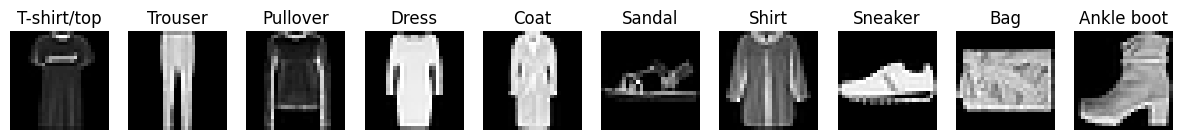

In [58]:
from torchvision.utils import make_grid
import random

# Define a function to visualize one random image from each class
def visualize_random_images_per_class(dataset):
    class_names = dataset.classes
    num_classes = len(class_names)

    # Dictionary to store one image per class
    images_per_class = {class_name: None for class_name in class_names}

    # Collect indices for each class
    class_indices = {class_name: [] for class_name in class_names}

    for idx, (image, label) in enumerate(dataset):
        class_name = class_names[label]
        class_indices[class_name].append(idx)

    # Randomly select one image per class
    for class_name in class_names:
        random_idx = random.choice(class_indices[class_name])
        images_per_class[class_name] = dataset[random_idx][0]

    # Plot the images
    fig, axes = plt.subplots(1, num_classes, figsize=(15, 15))
    for ax, (class_name, image) in zip(axes, images_per_class.items()):
        ax.imshow(image.squeeze(), cmap='gray')
        ax.set_title(class_name)
        ax.axis('off')
    plt.show()

# Visualize random images from the training set
visualize_random_images_per_class(train_set)


## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [83]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True
    # `i` is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the parameters dictionary
parameters = {}

# Define the model architecture
input_dim = 28 * 28  # Input dimension for the FashionMNIST dataset (flattened image size)
hidden_dim1 = 256    # Dimension of the first hidden layer
hidden_dim2 = 128    # Dimension of the second hidden layer
output_dim = 10      # Output dimension (number of classes in FashionMNIST)

# Add layers to the parameters dictionary
add_linear_layer(parameters, (input_dim, hidden_dim1), device, i=1)
add_linear_layer(parameters, (hidden_dim1, hidden_dim2), device, i=2)
add_linear_layer(parameters, (hidden_dim2, output_dim), device, i=3)

# Display the initialized parameters
for name, param in parameters.items():
    print(f"{name}: {param.shape}")

w1: torch.Size([784, 256])
b1: torch.Size([256])
w2: torch.Size([256, 128])
b2: torch.Size([128])
w3: torch.Size([128, 10])
b3: torch.Size([10])


Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [84]:
# input_dim : input dimention of the first layer, which you have calculated before.
layers = [
    (input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]
num_layers = len(layers)
parameters = {}

# setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# adding the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [85]:
def affine_forward(x, w, b):
    """
    Computes the forward pass for a fully connected layer.

    Inputs:
    - x: Input data, of shape (N, D), where N is the number of samples and D is the dimension of the input.
    - w: Weights, of shape (D, M), where M is the number of neurons in the layer.
    - b: Biases, of shape (M,).

    Returns a tuple of:
    - out: Output, of shape (N, M), where N is the number of samples and M is the number of neurons in the layer.
    """
    out = x.mm(w) + b
    return out

def relu(x):
    """
    Computes the ReLU activation function element-wise.

    Inputs:
    - x: Input data.

    Returns:
    - out: Output after applying ReLU activation function element-wise.
    """
    out = x.clamp(min=0)
    return out

Function `model` returns output of the whole model for the input `x` using the parameters:

In [86]:
def model(x: torch.Tensor, parameters, num_layers=num_layers):
    # Number of batches
    B = x.shape[0]
    x = x.view(B, -1)  # Flatten the input

    # Forward pass through each layer
    for i in range(num_layers - 1):
        # Get weights and biases for the current layer
        w = parameters[f'w{i}']
        b = parameters[f'b{i}']
        # Perform affine transformation
        x = affine_forward(x, w, b)
        # Apply ReLU activation function
        x = relu(x)

    # Output layer (no activation function)
    w = parameters[f'w{num_layers - 1}']
    b = parameters[f'b{num_layers - 1}']
    output = affine_forward(x, w, b)

    return output

Implementing cross entropy loss:

In [87]:
def cross_entropy_loss(scores, y):
    """
    Computes the cross-entropy loss.

    Inputs:
    - scores: Predicted scores from the model, of shape (N, C), where N is the number of samples
              and C is the number of classes.
    - y: Ground truth labels, of shape (N,), where N is the number of samples.

    Returns:
    - loss: Scalar value representing the cross-entropy loss.
    """
    # Compute softmax to get probabilities
    probs = torch.softmax(scores, dim=1)

    # Convert ground truth labels to one-hot encoding
    y_onehot = torch.zeros_like(scores)
    y_onehot.scatter_(1, y.view(-1, 1), 1)

    # Compute cross-entropy loss
    loss = -torch.sum(y_onehot * torch.log(probs + 1e-10)) / len(y)

    return loss

Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [88]:
from typing import Dict

def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    '''This function gets the parameters and a learning rate. Then updates the parameters using their
    gradient. Finally, you should zero the gradients of the parameters after updating
    the parameter value.'''

    """
    Performs optimization using stochastic gradient descent (SGD) with given learning rate.

    Inputs:
    - parameters: Dictionary containing the parameters to be optimized.
    - learning_rate: Learning rate for the optimization (default: 0.001).
    """
    # Update parameters using gradients
    for param_name, param in parameters.items():
        # Update parameter value using gradient and learning rate
        param.data -= learning_rate * param.grad.data

        # Zero out the gradients
        param.grad.zero_()

Training functions:

In [94]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    """
    Computes the accuracy of predictions.

    Inputs:
    - y_pred: Predicted labels, numpy array of shape (N,).
    - y_true: True labels, numpy array of shape (N,).

    Returns:
    - acc: Accuracy of predictions.
    """

    acc = np.mean(y_pred == y_true)
    return acc

def train(train_loader, learning_rate=0.001, epoch=None):
    '''This function implements the training loop for a single epoch. For each batch you should do the following:
        1- Calculate the output of the model to the given input batch
        2- Calculate the loss based on the model output
        3- Update the gradients using backward method
        4- Optimize the model parameters using the sgd_optimizer function defined previously
        5- Print the train loss (Show the epoch and batch as well)
        '''
    train_loss = 0
    N_train = len(train_loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []


    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        # Calculate the cross-entropy loss
        loss = cross_entropy_loss(p, y)

        # Update the gradients using backward method
        loss.backward()

        # Optimize the model parameters using SGD
        sgd_optimizer(parameters, learning_rate)

        # Accumulate the training loss
        train_loss += loss.item()

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of train set: {acc}')
    return train_loss, acc


def validate(loader, epoch=None, set_name=None):
    '''This function validates the model on the test dataloader. The function goes through each batch and does
    the following on each batch:
        1- Calculate the model output
        2- Calculate the loss using the model output
        3- Print the loss for each batch and epoch

    Finally the function calculates the model accuracy.'''
    total_loss = 0
    N = len(loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        # Calculate the cross-entropy loss
        loss = cross_entropy_loss(p, y)

        # Accumulate the total loss
        total_loss += loss.item()

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= N
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of {set_name} set: {acc}')

    return total_loss, acc

In [95]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [96]:
def train_model(dataloaders, num_epochs, learning_rate=0.001, model_name='pytorch_model'):
    """
    Trains the model for the specified number of epochs and plots the loss and accuracy history.

    Inputs:
    - dataloaders: Tuple containing DataLoader for training and test sets.
    - num_epochs: Number of epochs to train the model.
    - learning_rate: Learning rate for optimization (default: 0.001).
    - model_name: Name of the model (default: 'pytorch_model').

    Returns:
    - train_losses: List containing training losses for each epoch.
    - test_losses: List containing test losses for each epoch.
    - train_accuracies: List containing training accuracies for each epoch.
    - test_accuracies: List containing test accuracies for each epoch.
    """

    for epoch in range(num_epochs):
        # Train the model for one epoch
        train_loss, train_acc = train(train_loader, learning_rate, epoch)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validate the model on the test set
        test_loss, test_acc = validate(test_loader, epoch, set_name='Test')
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

    # Plot the loss history
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.legend()
    plt.show()

    # Plot the accuracy history
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy History')
    plt.legend()
    plt.show()

    return train_losses, test_losses, train_accuracies, test_accuracies


Accuracy of train set: 0.26376666666666665
Accuracy of Test set: 0.29241666666666666
Accuracy of train set: 0.27266666666666667
Accuracy of Test set: 0.34741666666666665
Accuracy of train set: 0.5022666666666666
Accuracy of Test set: 0.5972166666666666
Accuracy of train set: 0.6032333333333333
Accuracy of Test set: 0.6233333333333333
Accuracy of train set: 0.6776666666666666
Accuracy of Test set: 0.7065833333333333
Accuracy of train set: 0.7357666666666667
Accuracy of Test set: 0.7522666666666666
Accuracy of train set: 0.7640833333333333
Accuracy of Test set: 0.7414666666666667
Accuracy of train set: 0.7818666666666667
Accuracy of Test set: 0.7620833333333333
Accuracy of train set: 0.7948666666666667
Accuracy of Test set: 0.7871
Accuracy of train set: 0.8028166666666666
Accuracy of Test set: 0.7697666666666667
Accuracy of train set: 0.8131666666666667
Accuracy of Test set: 0.81615
Accuracy of train set: 0.8197333333333333
Accuracy of Test set: 0.8208666666666666
Accuracy of train set: 

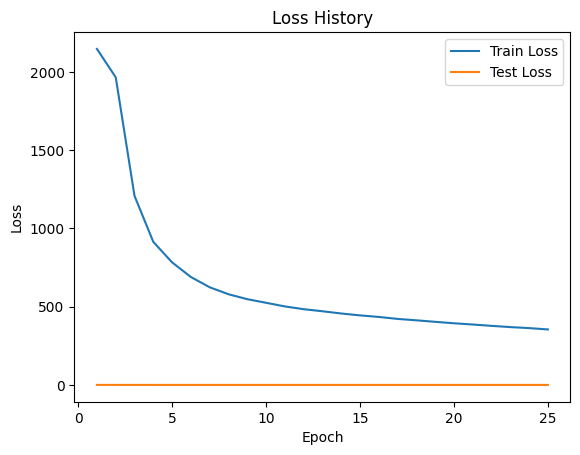

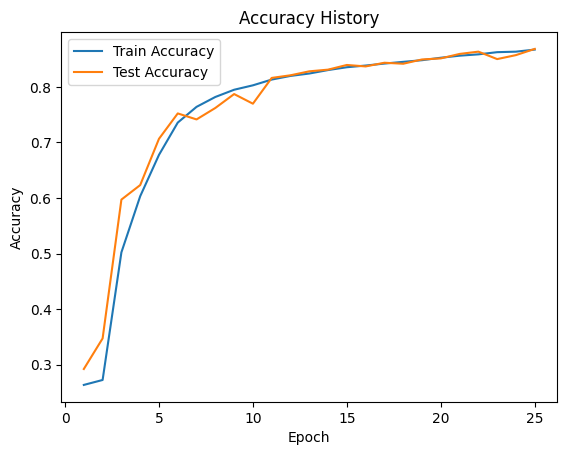

([2147.924390077591,
  1966.4522091150284,
  1208.2325706481934,
  914.4239966273308,
  783.3963936567307,
  689.8659798502922,
  624.3775251805782,
  579.7287704646587,
  548.1683385968208,
  525.0272414386272,
  501.849850744009,
  484.2169996649027,
  470.99135361611843,
  456.681459993124,
  444.55245457589626,
  434.64397443830967,
  422.0449498295784,
  412.99657824635506,
  403.44156691432,
  394.09299360215664,
  386.1521573215723,
  377.67585299909115,
  369.71682389080524,
  363.22751308977604,
  354.72667820751667],
 [0.21276889152526857,
  0.15644179166555405,
  0.09964580175876618,
  0.08487408668398858,
  0.07361902419328689,
  0.06526259572207928,
  0.0648079993635416,
  0.05995917457640171,
  0.05506999137699604,
  0.05747047875225544,
  0.04931770364940166,
  0.04837100028544664,
  0.04641868394166231,
  0.045396617993712425,
  0.043277909068763255,
  0.04353204003125429,
  0.04162764249593019,
  0.042271822774410245,
  0.04009859694838524,
  0.03998270819634199,
  0.0

In [97]:
train_model([train_loader, test_loader], num_epochs=25, learning_rate=0.005)

In [98]:
print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 0.8683166666666666


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

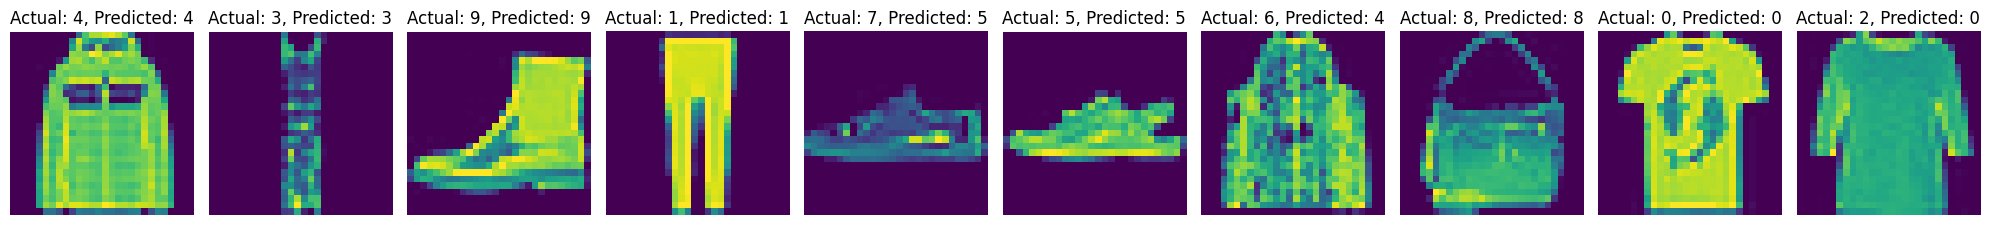

In [102]:
import matplotlib.pyplot as plt

def visualize_images_with_labels(loader, model, parameters):
    """
    Visualizes one image from each class along with actual and predicted labels.

    Inputs:
    - loader: DataLoader for the dataset.
    - model: Trained model for making predictions.
    - parameters: Dictionary containing the parameters of the model.
    """
    # Create a dictionary to store one image from each class
    class_images = {}

    # Iterate through the dataset to find one image from each class
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)

        # Make predictions using the trained model
        with torch.no_grad():
            outputs = model(images, parameters)
            predictions = torch.argmax(outputs, dim=1)

        # Iterate through the batch and store one image from each class
        for image, label, prediction in zip(images, labels, predictions):
            class_idx = label.item()
            # Store the first image of each class along with its actual and predicted labels
            if class_idx not in class_images:
                class_images[class_idx] = (image.cpu(), label.item(), prediction.item())
                break  # Only store one image per class

    # Visualize one image from each class along with actual and predicted labels
    num_classes = len(class_images)
    fig, axs = plt.subplots(1, num_classes, figsize=(20, 3))

    for i, (class_idx, (image, actual_label, predicted_label)) in enumerate(class_images.items()):
        ax = axs[i]
        ax.imshow(image.permute(1, 2, 0))  # Convert (C, H, W) to (H, W, C)
        ax.set_title(f'Actual: {actual_label}, Predicted: {predicted_label}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize images with actual and predicted labels
visualize_images_with_labels(test_loader, model, parameters)
